In [147]:
import numpy as np
import geopandas
import rasterio
import matplotlib.pyplot as plt
from shapely.geometry import Point

import os
import sys  

root = os.getcwd() + "/.."

sys.path.insert(0, root)

import rasterio
import rasterio.plot

import src.manageExperiments as me
#importlib.reload(me)

In [148]:
fn = "linz_with_init_net.txt"
setup = me.readConfigFile(fn)


In [149]:
#image = "../data/" + setup["folder_input"] + setup["input_evm"]
#image = "../data/" + setup["folder_input"] + "World_atlas_linz_and_surroundings"
image = "../data/" + setup["folder_input"] + "linz_and_surroundings"

In [150]:
#image+"linz_and_surroundings.tiff"
image

'../data/locations/linz/linz_and_surroundings'

In [151]:
tiff = rasterio.open(image)

In [152]:
tiff.meta

{'driver': 'GTiff',
 'dtype': 'uint8',
 'nodata': 255.0,
 'width': 59,
 'height': 62,
 'count': 1,
 'crs': CRS.from_epsg(4326),
 'transform': Affine(0.008333330000000003, 0.0, 14.02492239,
        0.0, -0.008333329999999937, 48.587514784444444)}

In [153]:
tiff.bounds

BoundingBox(left=14.02492239, bottom=48.07084832444445, right=14.51658886, top=48.587514784444444)

In [154]:
#rasterio.plot.show(tiff, title = "Linz Night Time Image")

In [155]:
NTLI = tiff.read()[0]

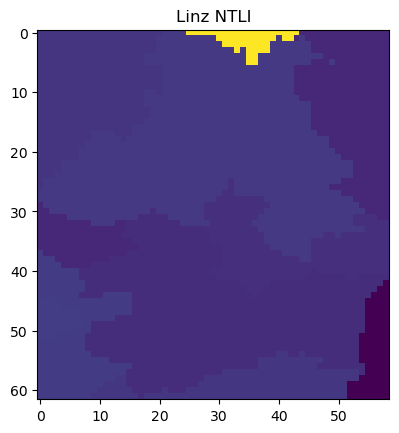

In [156]:
plt.imshow(NTLI)
plt.title("Linz NTLI")
plt.show()

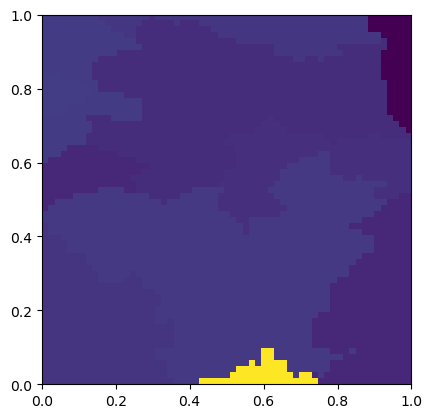

In [159]:
plt.imshow(NTLI, interpolation='nearest', origin='lower', extent=[0,1,0,1])

In [160]:
s1 = (14.308185, 48.305306)
s2 = (14.282806, 48.305306)
s3 = (14.268312, 48.293435)
s4 = (14.353622, 48.288528)
s5 = (14.210051, 48.258681)

locations = [s1, s2, s3, s4, s5]

In [161]:
#location of Lamhar's Light Quality Meter in format (lat, lon)
M = np.array([[tiff.transform[0], tiff.transform[1], tiff.transform[2]],[tiff.transform[3], tiff.transform[4], tiff.transform[5]]])
N = list()
for L in locations:
    s = L
    sensor_location = np.array(s)
    coord = np.linalg.inv(M[:,0:2])@(sensor_location-M[:,2])
    #coord = tiff.transform * sensor_location
    print("Location of Lamphars coordinate in the matrix in [lat, lon]: ", coord)
    six = tuple(coord[::-1].round().astype(int))
    N.append(six)
    NTLI[six]=np.max(NTLI)
    

Location of Lamphars coordinate in the matrix in [lat, lon]:  [33.9915268  33.86506768]
Location of Lamphars coordinate in the matrix in [lat, lon]:  [30.94604558 33.86506768]
Location of Lamphars coordinate in the matrix in [lat, lon]:  [29.20676488 35.28958825]
Location of Lamphars coordinate in the matrix in [lat, lon]:  [39.44396898 35.87842848]
Location of Lamphars coordinate in the matrix in [lat, lon]:  [22.21544209 39.46006992]


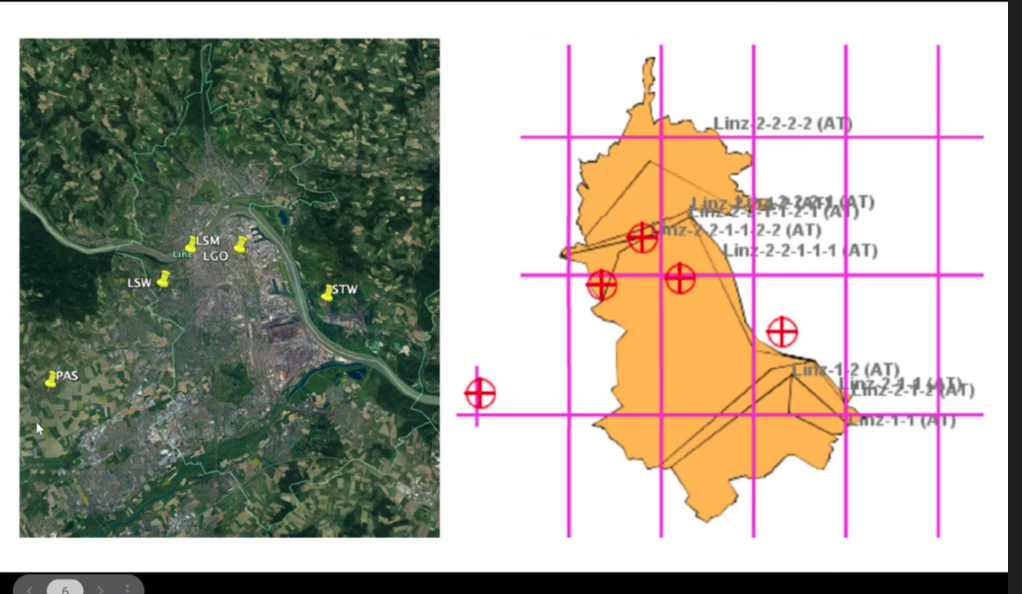

In [162]:
(np.unique(NTLI.flatten()))

array([ 20,  46,  47,  51,  52,  53,  55,  57,  58,  59,  61,  63, 255],
      dtype=uint8)

Text(0.5, 1.0, 'Sensor Locations in LINZ ')

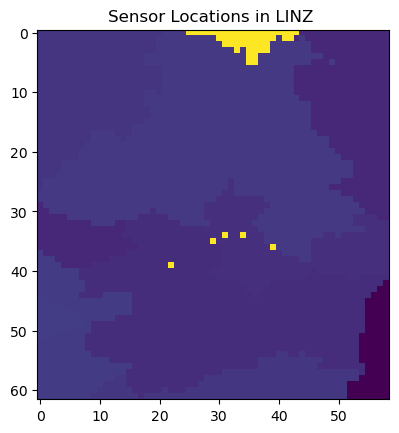

In [163]:


plt.imshow(NTLI)
plt.title("Sensor Locations in LINZ ")

References

https://geobgu.xyz/py/rasterio.html

Make LFS works

git config lfs.activitytimeout 60


In [14]:
N

[(34, 34), (34, 31), (35, 29), (36, 39), (39, 22)]

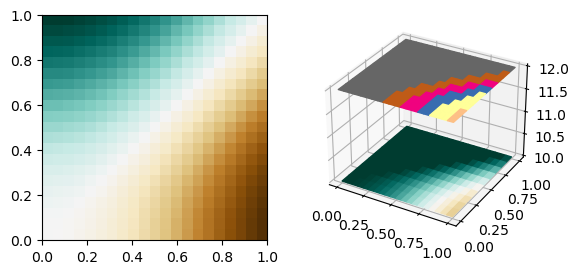

In [15]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# create a 21 x 21 vertex mesh
xx, yy = np.meshgrid(np.linspace(0,1,21), np.linspace(0,1,21))

# create vertices for a rotated mesh (3D rotation matrix)
X =  xx 
Y =  yy
Z =  10*np.ones(X.shape)
Z2 = 11*np.ones(X.shape)
Z3 = 12*np.ones(X.shape)

# create some dummy data (20 x 20) for the image
data = np.cos(xx) * np.cos(xx) + np.sin(yy) * np.sin(yy)

# create the figure
fig = plt.figure()

# show the reference image
ax1 = fig.add_subplot(121)
ax1.imshow(data, cmap=plt.cm.BrBG, interpolation='none', origin='lower', extent=[0,1,0,1])

# show the 3D rotated projection
ax2 = fig.add_subplot(122, projection='3d')
ax2.plot_surface(X, Y, Z, rstride=2, cstride=1, facecolors=plt.cm.BrBG(data), shade=False)
#ax2.plot_surface(X, Y, Z2, rstride=2, cstride=1, facecolors=plt.cm.BrBG(data), shade=False)
ax2.plot_surface(X, Y, Z3, rstride=2, cstride=1, facecolors=plt.cm.Accent(data), shade=False)


In [16]:
Z3.shape

(21, 21)

In [17]:
NTLI.shape

(62, 59)

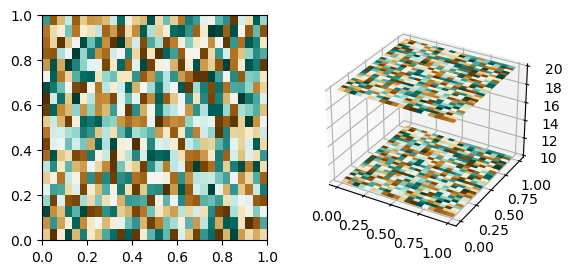

In [18]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# create a 21 x 21 vertex mesh
xx, yy = np.meshgrid(np.linspace(0,1,20), np.linspace(0,1,30))

# create some dummy data (20 x 20) for the image
data = np.random.random((20, 30))

# create vertices for a rotated mesh (3D rotation matrix)
X = np.sqrt(1./3) * xx + np.sqrt(1./3) * yy
X = xx
Y = -np.sqrt(1./3) * xx + np.sqrt(1./3) * yy
Y = yy
Z = np.ones((30,20))*10
Z1 = np.ones((30,20))*20

# create the figure
fig = plt.figure()

# show the reference image
ax1 = fig.add_subplot(121)
ax1.imshow(data, cmap=plt.cm.BrBG, interpolation='nearest', origin='lower', extent=[0,1,0,1])

# show the 3D rotated projection
ax2 = fig.add_subplot(122, projection='3d')
ax2.plot_surface(X, Y, Z, rstride=1, cstride=1, facecolors=plt.cm.BrBG(data.T), shade=False)
ax2.plot_surface(X, Y, Z1, rstride=1, cstride=1, facecolors=plt.cm.BrBG(data.T), shade=False)